<a href="https://colab.research.google.com/github/AmanPriyanshu/Discussing_Learning/blob/master/Council_for_Weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INTRODUCTION:

Weight Initialization is an important factor in Machine Learning. With the recent paper talking about the Lottery System, etc. it can be said that the random seed used to create these samples are important, here we will be implementing one such method to understanding it. Maybe.

## COUNCIL OF JUDGEMENT:

Creating a group of ML models which will learn the same analytical understanding with the same architecture but, we will try to train them with different random seeds.

## UPLOADING DATA:

In [1]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


## IMPORTS:

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import initializers
from matplotlib import pyplot as plt

## LOADING THE DATASET:

In [3]:
data = pd.read_csv('housing.csv')
features = data.columns
data = data.values
print(features)
print('data',data.shape,'\n',data)

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')
data (489, 4) 
 [[6.575e+00 4.980e+00 1.530e+01 5.040e+05]
 [6.421e+00 9.140e+00 1.780e+01 4.536e+05]
 [7.185e+00 4.030e+00 1.780e+01 7.287e+05]
 ...
 [6.976e+00 5.640e+00 2.100e+01 5.019e+05]
 [6.794e+00 6.480e+00 2.100e+01 4.620e+05]
 [6.030e+00 7.880e+00 2.100e+01 2.499e+05]]


## SCALING:

In [4]:
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

## SPLITING TO X and Y

In [5]:
x = data.T[:-1].T
y = data.T[-1]

print('X', x.shape, '\n', x)
print('Y', y.shape, '\n', y)

X (489, 3) 
 [[ 0.52055395 -1.1250769  -1.5250831 ]
 [ 0.28104837 -0.53706982 -0.33974768]
 [ 1.46924486 -1.25935736 -0.33974768]
 ...
 [ 1.14420158 -1.03178731  1.17748167]
 [ 0.86114953 -0.91305511  1.17748167]
 [-0.32704695 -0.71516812  1.17748167]]
Y (489,) 
 [ 0.30064004 -0.00449803  1.66104726  1.49576414  1.85175855  0.89820209
  0.16078509  0.69477671 -0.65291643 -0.34777836 -0.84362772 -0.34777836
  0.00821606 -0.15706706 -0.43677696 -0.2206375   0.18621326 -0.52577556
 -0.18249524 -0.43677696 -1.02162492 -0.25877975 -0.81819955 -0.90719815
 -0.7673432  -0.98348267 -0.64020234 -0.86905589 -0.41134879 -0.08078255
 -1.1360517  -0.90719815 -1.07248127 -1.08519536 -1.03433901 -0.34777836
 -0.20792341 -0.08078255  0.38963864  1.1651979   1.68647543  0.63120628
  0.46592316  0.38963864 -0.05535438 -0.29692201 -0.20792341 -0.64020234
 -0.91991224 -0.28420793 -0.24606567 -0.14435298  0.4277809   0.22435552
 -0.34777836  1.75004586  0.38963864  1.26691059  0.21164143 -0.25877975
 -0.37

## COUNCIL:

Now, creating a council of n members and just seeing what happens

In [6]:
class ModelCouncil:
  def __init__(self, x, y, shuffle_seed=0, n_members=5):
    self.n_members = n_members
    self.x = x
    self.y = y
    self.shuffle_seed = shuffle_seed
    self.council_weights = []
    self.council_weights_initial = []
    self.model = None
  
  def shuffler(self):
    indexes = np.arange(self.x.shape[0])
    np.random.seed(self.shuffle_seed)
    np.random.shuffle(indexes)
    self.x = self.x[indexes]
    self.y = self.y[indexes]

  def current_model(self, seed):
    tf.keras.backend.clear_session()
    tf.random.set_seed(seed)
    self.model = tf.keras.models.Sequential([
                                             tf.keras.layers.Dense(self.x.shape[1]//2+1, activation='relu', input_shape=(self.x.shape[1],), kernel_initializer=initializers.glorot_uniform(seed=seed)),
                                             tf.keras.layers.Dense(1, activation='tanh', kernel_initializer=initializers.glorot_uniform(seed=seed))
                                    ])
    self.model.compile(optimizer='adam', loss='mae', metrics=['mse'])

    w_a = []
    w_b = []
    for layer in self.model.layers:
      w_a.append(np.array(layer.get_weights()[0]))
      w_b.append(layer.get_weights()[1])
    w_a = np.array(w_a)
    w_b = np.array(w_b)
    self.council_weights_initial.append([w_a, w_b])

    self.model.fit(self.x, self.y, epochs=50, verbose=0, validation_split=0.2)

    print('Model'+str(seed), self.model.evaluate(self.x, self.y, verbose=0), '\n')
    w_a = []
    w_b = []
    for layer in self.model.layers:
      w_a.append(np.array(layer.get_weights()[0]))
      w_b.append(layer.get_weights()[1])
    w_a = np.array(w_a)
    w_b = np.array(w_b)
    self.council_weights.append([w_a, w_b])
  
  def council(self):
    self.shuffler()
    for seed in range(self.n_members):
      self.current_model(seed)
    self.council_weights = np.array(self.council_weights)
    self.council_weights_initial = np.array(self.council_weights_initial)
    return self.council_weights, self.council_weights_initial


In [7]:
mc = ModelCouncil(x, y, n_members=5)
w, w0 = mc.council()

Model0 [0.4993721544742584, 0.5078920125961304] 

Model1 [0.44608092308044434, 0.3789896070957184] 

Model2 [0.5259357690811157, 0.5126739740371704] 

Model3 [0.5277985334396362, 0.5002741813659668] 

Model4 [0.4777299165725708, 0.44870537519454956] 



In [8]:
weights = w.T[0]
bias = w.T[1]

weights0 = w0.T[0]
bias0 = w0.T[1]

In [9]:
print('weights', weights.shape, '\n',weights)
print()
print('bias',bias.shape,'\n', bias)

weights (2, 5) 
 [[array([[-0.35254797,  0.82100576],
       [ 0.8940695 ,  0.18031111],
       [ 0.13254352,  0.4463643 ]], dtype=float32)
  array([[ 0.94891346, -0.30145943],
       [-0.20208144,  0.52801394],
       [-0.3899046 ,  0.09911337]], dtype=float32)
  array([[ 0.9064774 ,  0.5969177 ],
       [-0.06378487,  0.12242074],
       [-0.40544918,  0.04231537]], dtype=float32)
  array([[-0.63536435,  1.1784456 ],
       [ 0.4863884 ,  0.339964  ],
       [-0.4271476 , -0.951639  ]], dtype=float32)
  array([[ 0.4877965 ,  0.9814446 ],
       [-0.8293899 ,  0.23175438],
       [-0.11996429, -0.38683578]], dtype=float32)]
 [array([ 0.40234482, -0.1747629 ], dtype=float32)
  array([-0.00596247,  0.21203089], dtype=float32)
  array([ 0.09755364, -0.28363907], dtype=float32)
  array([ 0.00996569, -0.04290593], dtype=float32)
  array([ 0.25017947, -0.3058969 ], dtype=float32)]]

bias (2, 5) 
 [[array([[-1.0584335 ],
       [ 0.35455352]], dtype=float32)
  array([[ 1.0470495],
       [-0

LET US PLOT THESE WEIGHTS:

Initial
[[-0.6331334   0.45134532]
 [ 0.657406    0.59327614]
 [-0.24409002  0.81141686]] 	 [-0.81737167  0.58268416]
After
[[-0.35254797  0.82100576]
 [ 0.8940695   0.18031111]
 [ 0.13254352  0.4463643 ]] 	 [-1.0584335   0.35455352]



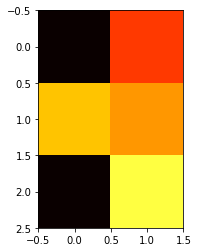

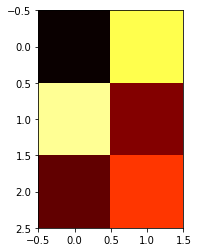


Initial
[[ 0.82922614 -0.08767891]
 [ 0.21972716 -0.23530674]
 [-0.5407265  -0.12203431]] 	 [ 1.0705262  -0.11319292]
After
[[ 0.94891346 -0.30145943]
 [-0.20208144  0.52801394]
 [-0.3899046   0.09911337]] 	 [ 1.0470495 -0.5516744]



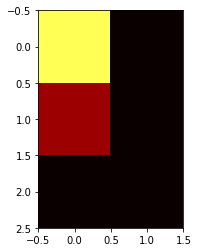

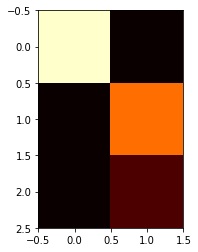


Initial
[[ 0.659412    0.44851208]
 [ 0.43199587  0.47018325]
 [-0.19903636  0.36630118]] 	 [0.85129726 0.5790266 ]
After
[[ 0.9064774   0.5969177 ]
 [-0.06378487  0.12242074]
 [-0.40544918  0.04231537]] 	 [1.0845541 0.3160286]



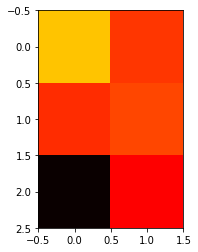

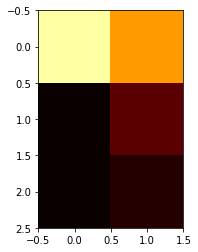


Initial
[[-0.6662216   0.9625573 ]
 [ 0.07071137  0.74718416]
 [-0.69492495 -0.83491707]] 	 [-0.86008835  1.2426559 ]
After
[[-0.63536435  1.1784456 ]
 [ 0.4863884   0.339964  ]
 [-0.4271476  -0.951639  ]] 	 [-0.8518345  1.0333056]



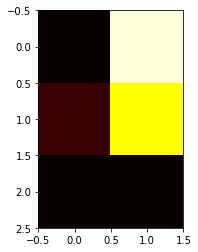

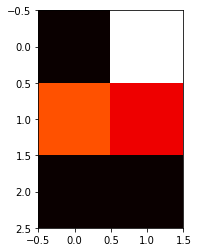


Initial
[[ 0.1765809   0.8890387 ]
 [-0.46525514  0.59153664]
 [ 0.10605359 -0.22729391]] 	 [0.22796488 1.147744  ]
After
[[ 0.4877965   0.9814446 ]
 [-0.8293899   0.23175438]
 [-0.11996429 -0.38683578]] 	 [0.6149181 0.8677592]



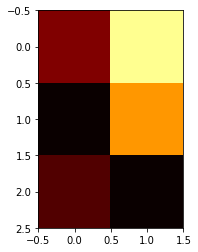

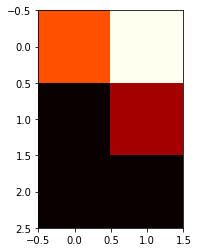


Initial
[[0. 0.]] 	 [0.]
After
[[ 0.40234482 -0.1747629 ]] 	 [0.28991628]



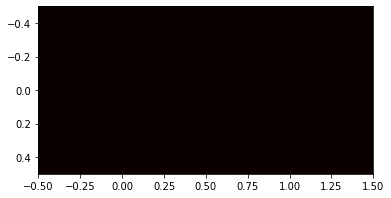

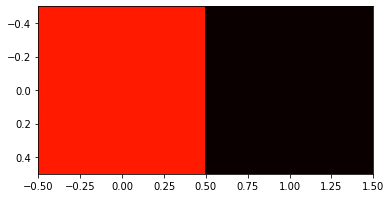


Initial
[[0. 0.]] 	 [0.]
After
[[-0.00596247  0.21203089]] 	 [-0.17884147]



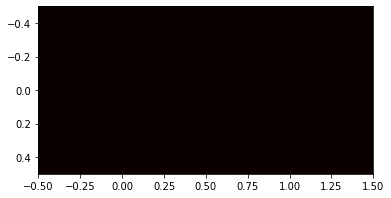

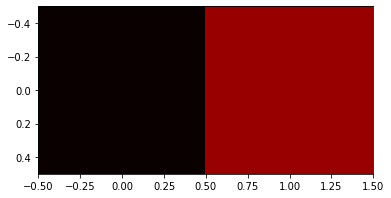


Initial
[[0. 0.]] 	 [0.]
After
[[ 0.09755364 -0.28363907]] 	 [-0.32375526]



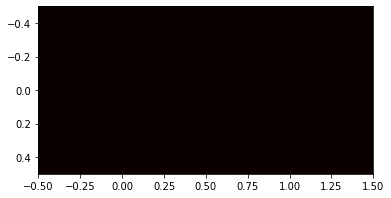

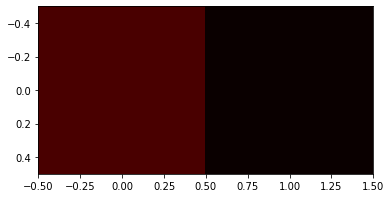


Initial
[[0. 0.]] 	 [0.]
After
[[ 0.00996569 -0.04290593]] 	 [-0.1372016]



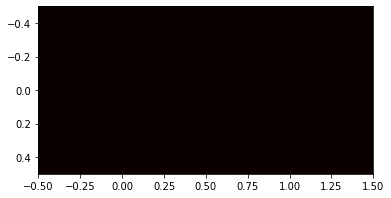

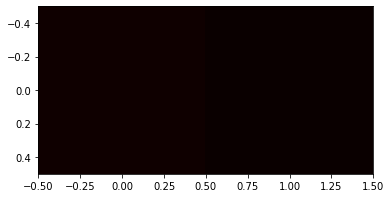


Initial
[[0. 0.]] 	 [0.]
After
[[ 0.25017947 -0.3058969 ]] 	 [-0.42162526]



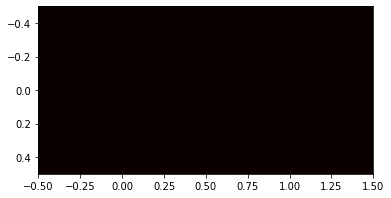

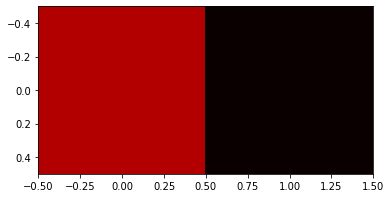

In [10]:
for layer_w, layer_b, layer_w0, layer_b0  in zip(weights, bias, weights0, bias0):
  for member, b, member0, b0 in zip(layer_w, layer_b, layer_w0, layer_b0):
    try:
      _ = member.shape[1]
    except:
      member = np.array([member])
      member0 = np.array([member0])
    print('Initial')
    print(member0,'\t', b0.flatten())
    plt.imshow(member0, cmap=plt.get_cmap('hot'), interpolation=None,
               vmin=0, vmax=1)
    print('After')
    print(member,'\t', b.flatten())
    print()
    plt.pause(0.1)
    plt.imshow(member, cmap=plt.get_cmap('hot'), interpolation=None,
               vmin=0, vmax=1)
    plt.pause(0.1)
    print()


The above images and their respective results give us a little bit of an insight into how weight initialization affects the final weights